## Computer Problem Set 3.3
#### Two-factor gaussian yield curve


In [92]:
# import 
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

#### 1`

In [93]:
n = 1500
M = int(1e4)
h = 0.01
T = 15
theta_i = np.array([0.05, 0.05])
sigma_i = np.array([0.05, 0.05])
x_i = [0.02, 0.02]
_lambda = np.array([1, 0.1])


##### a- Instantaneous rate $ \{ r_j~, j = 0, ..., n\}$ 

In [94]:
def BrownVect(n ,M, T):
    W = np.random.randn(M,2, n+1)*np.sqrt(T/n)
    W[:, :, 0] = 0
    B = W.cumsum(axis = 2)
    return B 

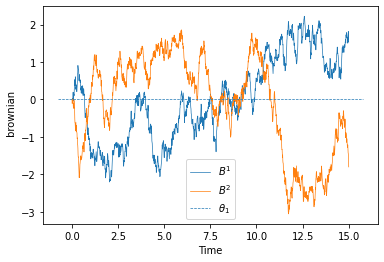

In [95]:
brown = BrownVect(n , M, T)
fig , ax = plt.subplots(1,1)
point = np.linspace(0, T, n+1, endpoint= True)
ax.plot(point, brown[0][0], linewidth=.7, label="$B^1$")
ax.plot(point, brown[1][0], linewidth=.7, label="$B^2$")
xlims = plt.xlim()
plt.hlines(0, *xlims, label=r"$\theta_1$", linestyle="--", linewidth=.7)
ax.set_xlabel("Time")
ax.set_ylabel(" brownian")
ax.legend()

The stochastic integrale $\int_{t_{j-1}}^{t_{j}}e^{-λ_{i}(t_{j}-s)}dB_{s}^{i} \thicksim \mathcal N (0,\int_{t_{j-1}}^{t_{j}}e^{-2λ_{i}(t_{j}-s)}ds ) 
\newline 
Avec:  
\newline
\int_{t_{j-1}}^{t_{j}}e^{-2λ_{i}(t_{j}-s)}ds = \frac{1}{2λ_{i}}\big[ 1 - e^{-2λ_{i}(t_j - t_{j-1})} \big]
 $ 

In [96]:
def simualtionX (x_i, theta_i, sigma_i, _lambda, h, n, M):
    times = np.linspace(0, T, n+1, endpoint= True)
    delta_time = times[1:] - times[:-1]
    _int = np.empty((2,M, n))
    X = np.empty((2, M, n+1))
    X[0,:,0] = x_i[0]
    X[1,:,0] = x_i[1]
    for i in range(n):
        _int[0,:, i] = np.random.randn(M)*np.sqrt((1-np.exp(-2*_lambda[0]*delta_time[i]))/(2*_lambda[0]))
        _int[1,:, i] = np.random.randn(M)*np.sqrt((1-np.exp(-2*_lambda[1]*delta_time[i]))/(2*_lambda[1]))
    
    exp = np.exp(-_lambda*h)
    for i in range(1, n+1):
        X[0,:,i] = theta_i[0] + ( X[0, :, i-1] - theta_i[0])*exp[0] + sigma_i[0]*_int[0,:,i-1]
        X[1,:,i] = theta_i[1] + ( X[1, :, i-1] - theta_i[1])*exp[1] + sigma_i[1]*_int[1,:,i-1]
    
    #r_i = X[0] + X[1]
    return X # the solution r_i is equal to X[0] + X[1]


>> Simulation of $r_{t_{j}}$ for $j \in \{0,...,n\}$

In [97]:
X = simualtionX(x_i, theta_i, sigma_i, _lambda, h, n, M)
# then the solutoi that we search is:

r_j = X[0] + X[1]

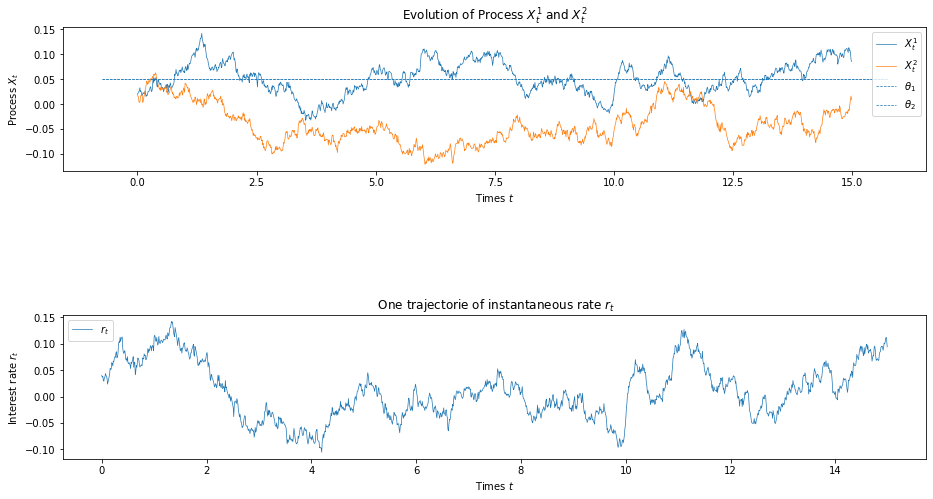

In [98]:
times = np.linspace(0, T, n+1, endpoint=False)
figure = plt.figure(figsize = (20, 10))
plt.gcf().subplots_adjust(left = 0.1, bottom = 0.1,
                       right = 0.7, top = .7, wspace = 0, hspace = 1)
axes = figure.add_subplot(2, 1, 1)
axes.set_xlabel('Times $t$')
axes.set_ylabel('Process $X_t$')
axes.set_title('Evolution of Process $X_{t}^{1}$ and $X_{t}^{2}$')
axes.plot(times, X[0][0],
        linewidth=.7, label="$X^{1}_t$")

axes.plot(times, X[1][0],
        linewidth=.7, label="$X^{2}_t$"
)
xlims = plt.xlim()
plt.hlines(theta_i[0], *xlims, label=r"$\theta_1$", linestyle="--", linewidth=.7)
plt.hlines(theta_i[1], *xlims, label=r"$\theta_2$", linestyle="--", linewidth=.7)
axes.legend()
axes = figure.add_subplot(2, 1, 2)
axes.set_xlabel('Times $t$')
axes.set_ylabel('Interest rate $r_t$')
axes.set_title(' One trajectorie of instantaneous rate $r_t$')
axes.plot(times, r_j[0],
        linewidth=.7, label="$r_t$")

axes.legend()

##### b- Monte Carlo approximation of $ \hat{P}_{0}^{n,M}(t_j) $ of the zero-coupon bond approximation value $ \hat{P}_{0}^{n}(t_j) :=\frac{1}{M}∑_{m = 1}^{M} e^{-h∑_{k=1}^{j}r_{t_k}^{(m)}} $, and Monte Carlo approximation of $ \hat{R}_{0}^{n,M}(t_j). $
$ 
Avec:\hat{R}_{0}^{n,M}(t_j) = -\frac{ln(P_{0}(t_j))}{t_j} 
$


In [99]:
def montecarlo(rate, T, h, n, theta_i):
    rate = rate.cumsum(axis = 1)
    times = np.linspace(0, T, n+1, endpoint= True)
    Pn_j = np.mean(np.exp(-h*rate), axis = 0)
    Rn_j = np.zeros(len(Pn_j))

    Rn_j[1:] = -np.log(Pn_j[1:])/times[1:]
    Rn_j[0] = sum(theta_i)
    return Pn_j, Rn_j
    

>>> Monte Carlo approximation of yield and zero-coupon bonds

In [100]:
Pn_j, Rn_j = montecarlo(r_j, T, h, n, theta_i)

##### c- Plot Yield curve $\{ R_0(t_j), j = 0,...,n\}$, and compare it with his corresponding Monte Carlo approximation $\{ \hat{R}_{0}^{n,M}(t_j), j = 0,...,n\}$

In [101]:
def yieldCurve(x_i,theta_i, _lambda,T, sigma_i):
    _int = [0,0]
    rho = [0, 0]
    Lambda = [0,0]
    if T == 0:
        return sum(theta_i)
    for i in range(2):
        Lambda[i] = (1 - np.exp(-_lambda[i]*T))/_lambda[i]
        _int[i] = (-3 + 4*np.exp(-_lambda[i]*T) - np.exp(-2*_lambda[i]*T) + 2*_lambda[i]*T)/(2*_lambda[i]**3)
        rho[i] = theta_i[i] + (x_i[i]-theta_i[i])*(Lambda[i]/T) - (sigma_i[i]**2/(2*T))*_int[i]
    
    Res = rho[1] + rho[0]    
    return Res

>>  Exact yield curve 

In [102]:
yields_j = np.array([ yieldCurve(x_i,theta_i, _lambda,t_i, sigma_i) for t_i in np.linspace(0, T, n+1, endpoint = True)])

>>> Display and compare

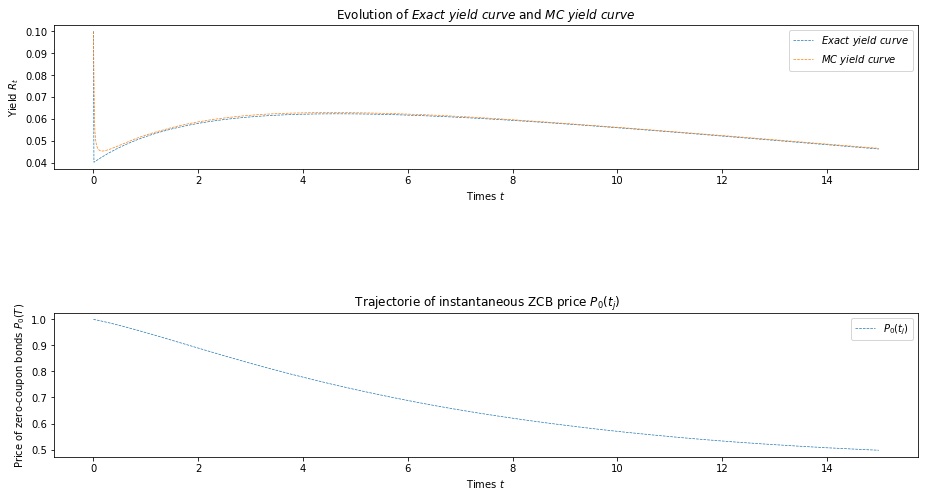

In [103]:
times = np.linspace(0, T, n+1, endpoint=False)
figure = plt.figure(figsize = (20, 10))
plt.gcf().subplots_adjust(left = 0.1, bottom = 0.1,
                       right = 0.7, top = .7, wspace = 0, hspace = 1)
axes = figure.add_subplot(2, 1, 1)
axes.set_xlabel('Times $t$')
axes.set_ylabel('Yield $R_t$')
axes.set_title('Evolution of $Exact~yield~curve$ and $MC~yield~curve$')
axes.plot(times, yields_j,
        linewidth=.7,linestyle='--', label="$Exact~yield~curve$")

axes.plot(times, Rn_j,
        linewidth=.7, linestyle='--',label="$MC~yield~curve$"
)
#xlims = plt.xlim()
#plt.hlines(theta_i[0], *xlims, label=r"$\theta_1$", linestyle="--", linewidth=.7)
#plt.hlines(theta_i[1], *xlims, label=r"$\theta_2$", linestyle="--", linewidth=.7)
axes.legend()
axes = figure.add_subplot(2, 1, 2)
axes.set_xlabel('Times $t$')
axes.set_ylabel('Price of zero-coupon bonds $P_0(T)$')
axes.set_title(' Trajectorie of instantaneous ZCB price $P_0(t_j)$')
axes.plot(times, Pn_j,
        linewidth=.7, linestyle='--',label="$P_0(t_j)$")

axes.legend()

>>> Comment for zero coupon bunds
##### The evolution of The no-arbitrage price of the T-maturity zero-coupon bond evolves as expected. It decreases as you get closer to matutity.

>>> Comment for yield curve 
##### The exact curve and simulate are more closely excepted at zeros, perhaps because of calculate errors.

### 2- Effect of $x_i$ on Monte Carlo approximation 

#### a- fixing $x_2$ varying $x_1 \in \{0.01, 0.02, 0.05\}$

In [104]:
### Monte Carlo approximation and exact value of yield
mc_yields = []
#exact_yields = []
x = [[ 0.01, x_i[0]], [ 0.02, x_i[0]], [ 0.05, x_i[0]]]
for elt in x:
    X_1, X_2 = simualtionX(elt, theta_i, sigma_i, _lambda, h, n, M)
    mc_yields.append(montecarlo(X_1 + X_2, T, h, n, theta_i))
    #exact_yields.append( np.array([ yieldCurve(elt,theta_i, _lambda,t_i, sigma_i) for t_i in np.linspace(0, T, n+1, endpoint = True)]))
    

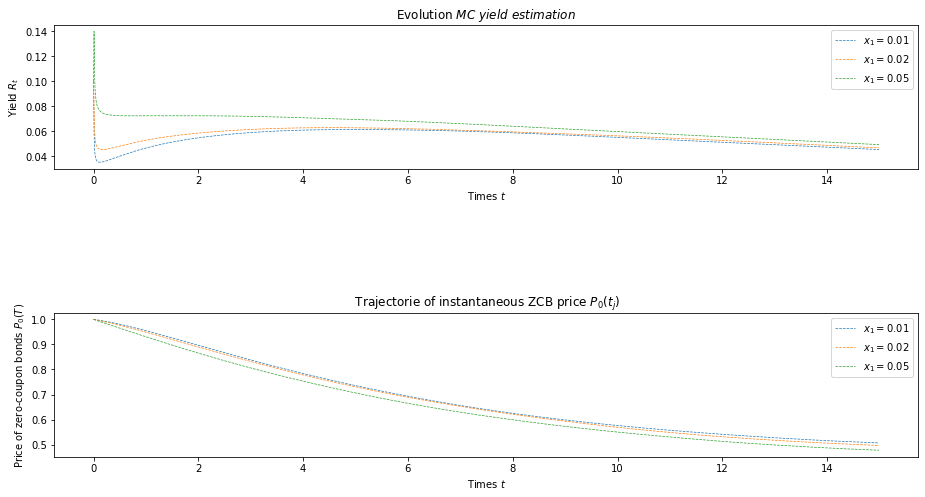

In [105]:
### Display curve

times = np.linspace(0, T, n+1, endpoint=False)
figure = plt.figure(figsize = (20, 10))
plt.gcf().subplots_adjust(left = 0.1, bottom = 0.1,
                       right = 0.7, top = .7, wspace = 0, hspace = 1)
axes = figure.add_subplot(2, 1, 1)
axes.set_xlabel('Times $t$')
axes.set_ylabel('Yield $R_t$')
axes.set_title('Evolution $MC~yield~ estimation $')
axes.plot(times, mc_yields[0][1],
        linewidth=.7,linestyle='--', label="$x_1 = 0.01$")

axes.plot(times, mc_yields[1][1],
        linewidth=.7, linestyle='--',label="$x_1 = 0.02$"
)
axes.plot(times, mc_yields[2][1],
        linewidth=.7, linestyle='--',label="$x_1 = 0.05$"
)

#xlims = plt.xlim()
#plt.hlines(theta_i[0], *xlims, label=r"$\theta_1$", linestyle="--", linewidth=.7)
#plt.hlines(theta_i[1], *xlims, label=r"$\theta_2$", linestyle="--", linewidth=.7)
axes.legend()
axes = figure.add_subplot(2, 1, 2)
axes.set_xlabel('Times $t$')
axes.set_ylabel('Price of zero-coupon bonds $P_0(T)$')
axes.set_title(' Trajectorie of instantaneous ZCB price $P_0(t_j)$')
axes.plot(times, mc_yields[0][0],
        linewidth=.7,linestyle='--', label="$x_1 = 0.01$")

axes.plot(times, mc_yields[1][0],
        linewidth=.7, linestyle='--',label="$x_1 = 0.02$"
)
axes.plot(times, mc_yields[2][0],
        linewidth=.7, linestyle='--',label="$x_1 = 0.05$"
)

axes.legend()


#### b- fixing $x_1$ varying $x_2 \in \{0.01, 0.02, 0.05\}$

In [106]:
### Monte Carlo approximation and exact value of yield
mc_yields = []
#exact_yields = []
x = [[x_i[0], 0.01], [x_i[0], 0.02], [x_i[0], 0.05]]
for elt in x:
    X_1, X_2 = simualtionX(elt, theta_i, sigma_i, _lambda, h, n, M)
    mc_yields.append(montecarlo(X_1 + X_2, T, h, n, theta_i))
    #exact_yields.append( np.array([ yieldCurve(elt,theta_i, _lambda,t_i, sigma_i) for t_i in np.linspace(0, T, n+1, endpoint = True)]))
    

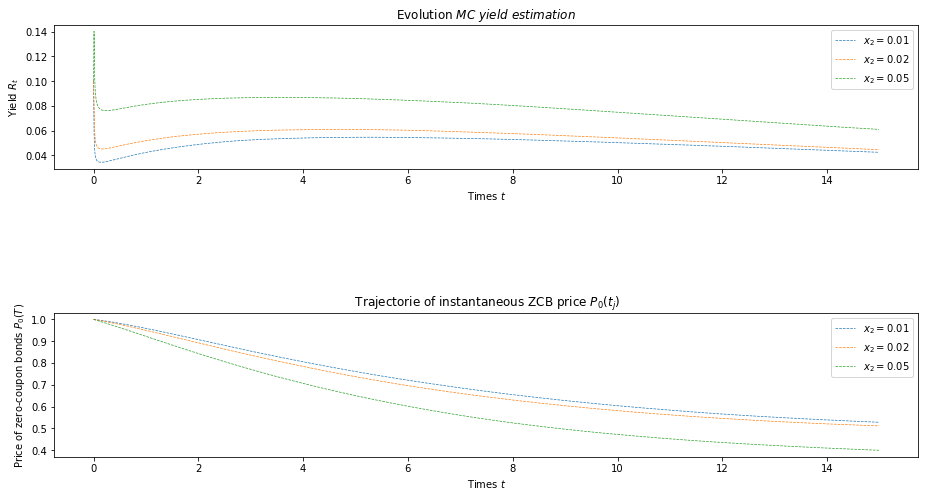

In [107]:
### Display curve

times = np.linspace(0, T, n+1, endpoint=False)
figure = plt.figure(figsize = (20, 10))
plt.gcf().subplots_adjust(left = 0.1, bottom = 0.1,
                       right = 0.7, top = .7, wspace = 0, hspace = 1)
axes = figure.add_subplot(2, 1, 1)
axes.set_xlabel('Times $t$')
axes.set_ylabel('Yield $R_t$')
axes.set_title('Evolution $MC~yield~ estimation $')
axes.plot(times, mc_yields[0][1],
        linewidth=.7,linestyle='--', label="$x_2 = 0.01$")

axes.plot(times, mc_yields[1][1],
        linewidth=.7, linestyle='--',label="$x_2 = 0.02$"
)
axes.plot(times, mc_yields[2][1],
        linewidth=.7, linestyle='--',label="$x_2 = 0.05$"
)

#xlims = plt.xlim()
#plt.hlines(theta_i[0], *xlims, label=r"$\theta_1$", linestyle="--", linewidth=.7)
#plt.hlines(theta_i[1], *xlims, label=r"$\theta_2$", linestyle="--", linewidth=.7)
axes.legend()
axes = figure.add_subplot(2, 1, 2)
axes.set_xlabel('Times $t$')
axes.set_ylabel('Price of zero-coupon bonds $P_0(T)$')
axes.set_title(' Trajectorie of instantaneous ZCB price $P_0(t_j)$')
axes.plot(times, mc_yields[0][0],
        linewidth=.7,linestyle='--', label="$x_2 = 0.01$")

axes.plot(times, mc_yields[1][0],
        linewidth=.7, linestyle='--',label="$x_2 = 0.02$"
)
axes.plot(times, mc_yields[2][0],
        linewidth=.7, linestyle='--',label="$x_2 = 0.05$"
)

axes.legend()

#### It seems that, by fixing either $x_1$ or $x_2$ and increase the other, leads to:
>>> Increase the decay rate of the Zero-Coupon Bond  

\\

>>> Increases the interest rates ( by shifting up the yield curve)

### 3- Effect of $θ_i$ on Monte Carlo approximation 

#### a- fixing $\theta_2$ varying $θ_1 \in \{0.01, 0.05, 0.1\}$

In [108]:
### Monte Carlo approximation and exact value of yield
mc_yields = []
#exact_yields = []
theta = [[ 0.01, theta_i[0]], [ 0.05, theta_i[0]], [ 0.1, theta_i[0]]]
for elt in theta:
    X_1, X_2 = simualtionX(x_i, elt, sigma_i, _lambda, h, n, M)
    mc_yields.append(montecarlo(X_1 + X_2, T, h, n, elt))
    

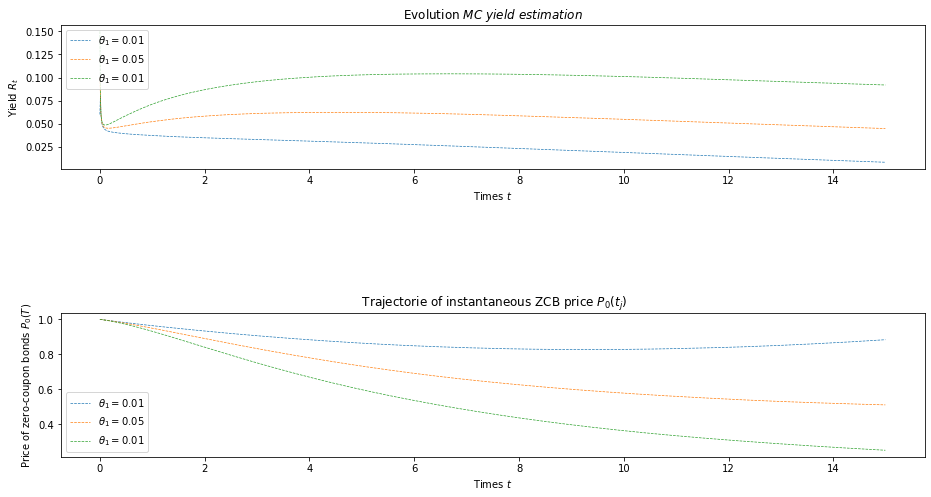

In [109]:
### Display curve

times = np.linspace(0, T, n+1, endpoint=False)
figure = plt.figure(figsize = (20, 10))
plt.gcf().subplots_adjust(left = 0.1, bottom = 0.1,
                       right = 0.7, top = .7, wspace = 0, hspace = 1)
axes = figure.add_subplot(2, 1, 1)
axes.set_xlabel('Times $t$')
axes.set_ylabel('Yield $R_t$')
axes.set_title('Evolution $MC~yield ~estimation $')
axes.plot(times, mc_yields[0][1],
        linewidth=.7,linestyle='--', label="$θ_1 = 0.01$")

axes.plot(times, mc_yields[1][1],
        linewidth=.7, linestyle='--',label="$θ_1 = 0.05$"
)
axes.plot(times, mc_yields[2][1],
        linewidth=.7, linestyle='--',label="$θ_1 = 0.01$"
)

#xlims = plt.xlim()
#plt.hlines(theta_i[0], *xlims, label=r"$\theta_1$", linestyle="--", linewidth=.7)
#plt.hlines(theta_i[1], *xlims, label=r"$\theta_2$", linestyle="--", linewidth=.7)
axes.legend()
axes = figure.add_subplot(2, 1, 2)
axes.set_xlabel('Times $t$')
axes.set_ylabel('Price of zero-coupon bonds $P_0(T)$')
axes.set_title(' Trajectorie of instantaneous ZCB price $P_0(t_j)$')
axes.plot(times, mc_yields[0][0],
        linewidth=.7,linestyle='--', label="$θ_1 = 0.01$")

axes.plot(times, mc_yields[1][0],
        linewidth=.7, linestyle='--',label="$θ_1 = 0.05$"
)
axes.plot(times, mc_yields[2][0],
        linewidth=.7, linestyle='--',label="$θ_1 = 0.01$"
)

axes.legend()


#### b- fixing $\theta_1$ varying $θ_2 \in \{0.01, 0.05, 0.1\}$

In [110]:
### Monte Carlo approximation and exact value of yield
mc_yields = []
#exact_yields = []
theta = [[ theta_i[0], 0.01], [ theta_i[0],0.05], [ theta_i[0], 0.1]]
for elt in theta:
    X_1, X_2 = simualtionX(x_i, elt, sigma_i, _lambda, h, n, M)
    mc_yields.append(montecarlo(X_1 + X_2, T, h, n, elt))
    

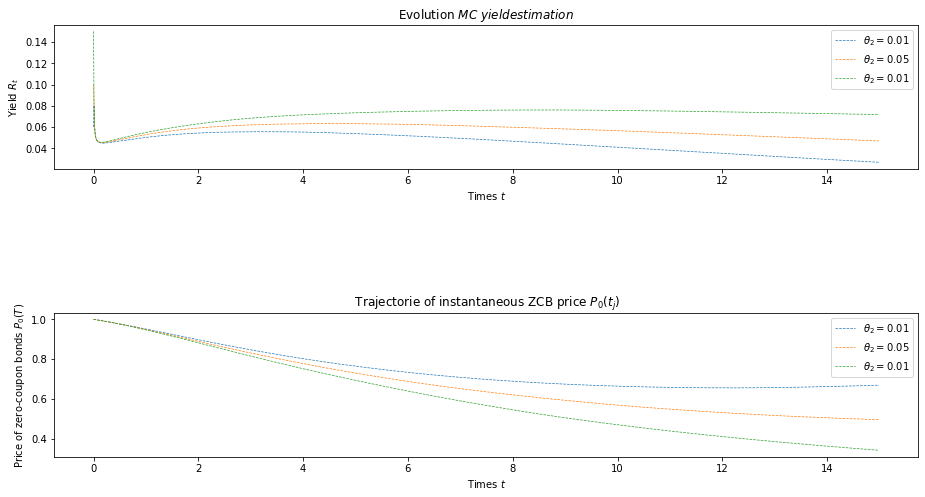

In [111]:
### Display curve

times = np.linspace(0, T, n+1, endpoint=False)
figure = plt.figure(figsize = (20, 10))
plt.gcf().subplots_adjust(left = 0.1, bottom = 0.1,
                       right = 0.7, top = .7, wspace = 0, hspace = 1)
axes = figure.add_subplot(2, 1, 1)
axes.set_xlabel('Times $t$')
axes.set_ylabel('Yield $R_t$')
axes.set_title('Evolution $MC~yield estimation $')
axes.plot(times, mc_yields[0][1],
        linewidth=.7,linestyle='--', label="$θ_2 = 0.01$")

axes.plot(times, mc_yields[1][1],
        linewidth=.7, linestyle='--',label="$θ_2 = 0.05$"
)
axes.plot(times, mc_yields[2][1],
        linewidth=.7, linestyle='--',label="$θ_2 = 0.01$"
)

#xlims = plt.xlim()
#plt.hlines(theta_i[0], *xlims, label=r"$\theta_1$", linestyle="--", linewidth=.7)
#plt.hlines(theta_i[1], *xlims, label=r"$\theta_2$", linestyle="--", linewidth=.7)
axes.legend()
axes = figure.add_subplot(2, 1, 2)
axes.set_xlabel('Times $t$')
axes.set_ylabel('Price of zero-coupon bonds $P_0(T)$')
axes.set_title(' Trajectorie of instantaneous ZCB price $P_0(t_j)$')
axes.plot(times, mc_yields[0][0],
        linewidth=.7,linestyle='--', label="$θ_2 = 0.01$")

axes.plot(times, mc_yields[1][0],
        linewidth=.7, linestyle='--',label="$θ_2 = 0.05$"
)
axes.plot(times, mc_yields[2][0],
        linewidth=.7, linestyle='--',label="$θ_2 = 0.01$"
)

axes.legend()

#### As the drift $λ_1 = 1 >> λ_2 = 0.1$, then the variation of $\theta_1$ generate more variation on both yield and ZBC price than the variation of $\theta_2$

### 4- Effect of $σ_i$ on Monte Carlo approximation 

#### a- fixing $\sigma_2$ varying $\sigma_1 \in \{0.01, 0.05, 0.1\}$

In [112]:
### Monte Carlo approximation and exact value of yield
mc_yields = []
#exact_yields = []
sigma = [[ 0.01, sigma_i[0]], [ 0.05, sigma_i[0]], [ 0.1, sigma_i[0]]]
for elt in sigma:
    X_1, X_2 = simualtionX(x_i, theta_i, elt, _lambda, h, n, M)
    mc_yields.append(montecarlo(X_1 + X_2, T, h, n, theta_i))
    

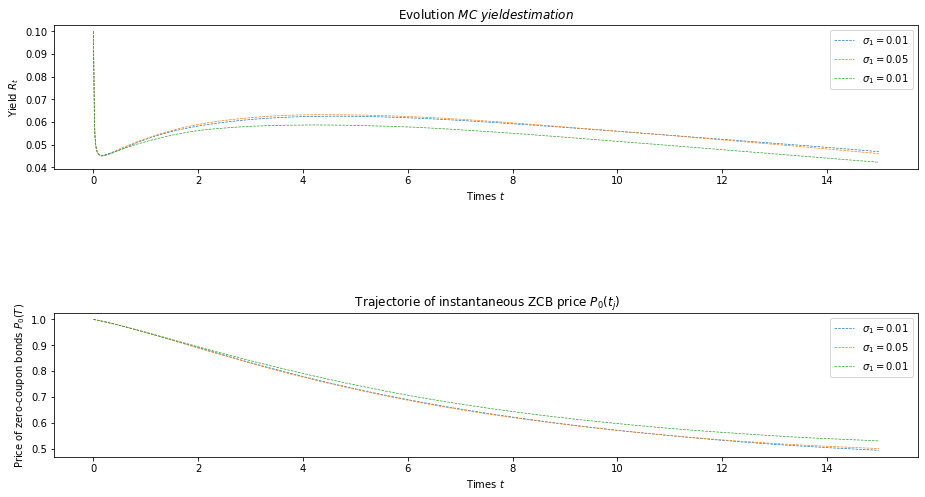

In [113]:
### Display curve

times = np.linspace(0, T, n+1, endpoint=False)
figure = plt.figure(figsize = (20, 10))
plt.gcf().subplots_adjust(left = 0.1, bottom = 0.1,
                       right = 0.7, top = .7, wspace = 0, hspace = 1)
axes = figure.add_subplot(2, 1, 1)
axes.set_xlabel('Times $t$')
axes.set_ylabel('Yield $R_t$')
axes.set_title('Evolution $MC~yield estimation $')
axes.plot(times, mc_yields[0][1],
        linewidth=.7,linestyle='--', label="$σ_1 = 0.01$")

axes.plot(times, mc_yields[1][1],
        linewidth=.7, linestyle='--',label="$σ_1 = 0.05$"
)
axes.plot(times, mc_yields[2][1],
        linewidth=.7, linestyle='--',label="$σ_1 = 0.01$"
)

#xlims = plt.xlim()
#plt.hlines(theta_i[0], *xlims, label=r"$\theta_1$", linestyle="--", linewidth=.7)
#plt.hlines(theta_i[1], *xlims, label=r"$\theta_2$", linestyle="--", linewidth=.7)
axes.legend()
axes = figure.add_subplot(2, 1, 2)
axes.set_xlabel('Times $t$')
axes.set_ylabel('Price of zero-coupon bonds $P_0(T)$')
axes.set_title(' Trajectorie of instantaneous ZCB price $P_0(t_j)$')
axes.plot(times, mc_yields[0][0],
        linewidth=.7,linestyle='--', label="$σ_1 = 0.01$")

axes.plot(times, mc_yields[1][0],
        linewidth=.7, linestyle='--',label="$σ_1 = 0.05$"
)
axes.plot(times, mc_yields[2][0],
        linewidth=.7, linestyle='--',label="$σ_1 = 0.01$"
)

axes.legend()

#### b- fixing $\sigma_1$ varying $\sigma_2 \in \{0.01, 0.05, 0.1\}$

In [114]:
### Monte Carlo approximation and exact value of yield
mc_yields = []
#exact_yields = []
sigma = [[ sigma_i[0], 0.01 ], [ sigma_i[0], 0.05], [ sigma_i[0], 0.1]]
for elt in sigma:
    X_1, X_2 = simualtionX(x_i, theta_i, elt, _lambda, h, n, M)
    mc_yields.append(montecarlo(X_1 + X_2, T, h, n, theta_i))
    

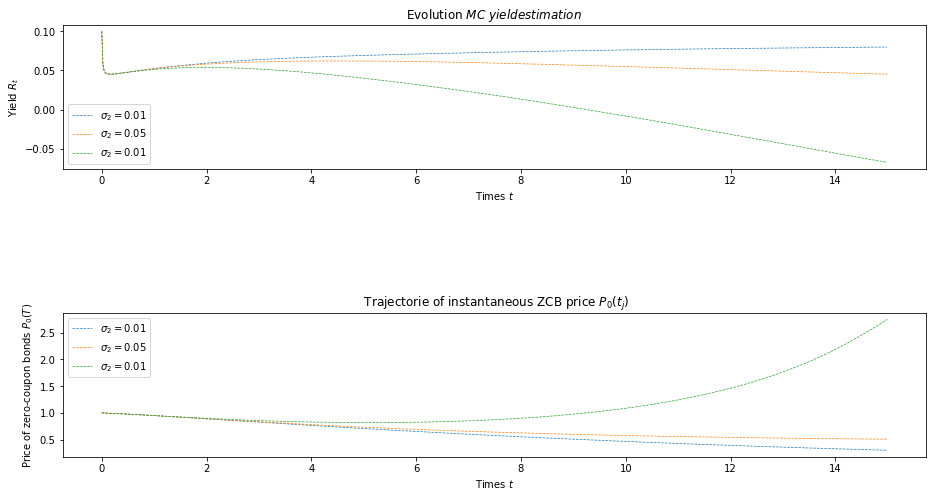

In [115]:
### Display curve

times = np.linspace(0, T, n+1, endpoint=False)
figure = plt.figure(figsize = (20, 10))
plt.gcf().subplots_adjust(left = 0.1, bottom = 0.1,
                       right = 0.7, top = .7, wspace = 0, hspace = 1)
axes = figure.add_subplot(2, 1, 1)
axes.set_xlabel('Times $t$')
axes.set_ylabel('Yield $R_t$')
axes.set_title('Evolution $MC~yield estimation $')
axes.plot(times, mc_yields[0][1],
        linewidth=.7,linestyle='--', label="$σ_2 = 0.01$")

axes.plot(times, mc_yields[1][1],
        linewidth=.7, linestyle='--',label="$σ_2 = 0.05$"
)
axes.plot(times, mc_yields[2][1],
        linewidth=.7, linestyle='--',label="$σ_2 = 0.01$"
)

#xlims = plt.xlim()
#plt.hlines(theta_i[0], *xlims, label=r"$\theta_1$", linestyle="--", linewidth=.7)
#plt.hlines(theta_i[1], *xlims, label=r"$\theta_2$", linestyle="--", linewidth=.7)
axes.legend()
axes = figure.add_subplot(2, 1, 2)
axes.set_xlabel('Times $t$')
axes.set_ylabel('Price of zero-coupon bonds $P_0(T)$')
axes.set_title(' Trajectorie of instantaneous ZCB price $P_0(t_j)$')
axes.plot(times, mc_yields[0][0],
        linewidth=.7,linestyle='--', label="$σ_2 = 0.01$")

axes.plot(times, mc_yields[1][0],
        linewidth=.7, linestyle='--',label="$σ_2 = 0.05$"
)
axes.plot(times, mc_yields[2][0],
        linewidth=.7, linestyle='--',label="$σ_2 = 0.01$"
)

axes.legend()

  ### While the drift $λ_2 << λ_1$ , as it was expected, changing the volaticity of $X^{(2)}$ has much impact for ZBC price and yield curve.